In [10]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
migration = pd.read_csv('/content/Final_3_years_dataset.csv')

In [6]:
migration.head()

,Date,Half,gurValue,gurIncoming,gurOutgoing,Lockdown,Delhi Covid Cases,gurVacc,gurTemp_max,gurTemp_min,...,muzOutgoing,muzVacc,muzTemp_max,muzTemp_min,muzTemp,totalVacc,is_weekend,is_holiday,final,day
0,03-01-2019,2,0.00,0,0,No,1,0,74.0,49.8,...,0,0,76.2,42.2,58.5,0,False,False,False,1
1,03-02-2019,2,0.50,0,0,No,2,0,64.4,55.1,...,0,0,76.7,52.8,60.1,0,True,False,True,2
2,03-03-2019,2,1.00,0,1,No,1,0,71.0,53.6,...,0,0,78.2,49.5,61.8,0,True,False,True,3
3,03-04-2019,2,0.50,0,0,No,2,0,73.9,55.1,...,0,0,76.4,53.1,63.4,0,False,False,False,4
4,03-05-2019,2,0.25,0,0,No,1,0,73.7,52.8,...,0,0,77.1,49.5,61.9,0,False,False,False,5


In [7]:
from sklearn.preprocessing import LabelEncoder
columns_to_be_encoded = ['Lockdown','is_weekend','is_holiday','final']  # list of column names you want encoded

# Instantiate the encoders
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    migration[column] = encoders[column].fit_transform(migration[column])

In [8]:
migration.head()

,Date,Half,gurValue,gurIncoming,gurOutgoing,Lockdown,Delhi Covid Cases,gurVacc,gurTemp_max,gurTemp_min,...,muzOutgoing,muzVacc,muzTemp_max,muzTemp_min,muzTemp,totalVacc,is_weekend,is_holiday,final,day
0,03-01-2019,2,0.00,0,0,0,1,0,74.0,49.8,...,0,0,76.2,42.2,58.5,0,0,0,0,1
1,03-02-2019,2,0.50,0,0,0,2,0,64.4,55.1,...,0,0,76.7,52.8,60.1,0,1,0,1,2
2,03-03-2019,2,1.00,0,1,0,1,0,71.0,53.6,...,0,0,78.2,49.5,61.8,0,1,0,1,3
3,03-04-2019,2,0.50,0,0,0,2,0,73.9,55.1,...,0,0,76.4,53.1,63.4,0,0,0,0,4
4,03-05-2019,2,0.25,0,0,0,1,0,73.7,52.8,...,0,0,77.1,49.5,61.9,0,0,0,0,5


In [9]:
migration = migration.drop(['Date'],axis=1)

In [12]:
migration.columns

Index(['Half', 'gurValue', 'gurIncoming', 'gurOutgoing', 'Lockdown',
       'Delhi Covid Cases', 'gurVacc', 'gurTemp_max', 'gurTemp_min', 'gurTemp',
       'ghaValue', 'ghaIncoming', 'ghaOutgoing', 'ghaVacc', 'ghaTemp_max',
       'ghaTemp_min', 'ghaTemp', 'farValue', 'farIncoming', 'farOutgoing',
       'farVacc', 'farTemp_max', 'farTemp_min', 'farTemp', 'easChaValue',
       'easChaIncoming', 'easChaOutgoing', 'easChaVacc', 'easChaTemp_max',
       'easChaTemp_min', 'easChaTemp', 'gayaValue', 'gayaIncoming',
       'gayaOutgoing', 'gayaVacc', 'gayaTemp_max', 'gayaTemp_min', 'gayaTemp',
       'darValue', 'darIncoming', 'darOutgoing', 'darVacc', 'darTemp_max',
       'darTemp_min', 'darTemp', 'meerValue', 'meerIncoming', 'meerOutgoing',
       'meerVacc', 'meerTemp_max', 'meerTemp_min', 'meerTemp', 'karValue',
       'karIncoming', 'karOutgoing', 'karVacc', 'karTemp_max', 'karTemp_min',
       'karTemp', 'muzValue', 'muzIncoming', 'muzOutgoing', 'muzVacc',
       'muzTemp_max', 'muzTe

In [15]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


# load dataset
values = migration.to_numpy()
# integer encode direction
encoder = LabelEncoder()

# print(values[:5,4])
n_days = 7
n_features = 71

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)

# drop columns we don't want to predict
Y_new = reframed[reframed.columns[[499,500,507,508,514,515,521,522,528,529,535,536,542,543,549,550,556,557]]]
X_new = reframed[reframed.columns[:-71]]
reframed = pd.concat([X_new, Y_new], axis=1)
print(reframed.columns)
print(reframed)

Index(['var1(t-7)', 'var2(t-7)', 'var3(t-7)', 'var4(t-7)', 'var5(t-7)',
       'var6(t-7)', 'var7(t-7)', 'var8(t-7)', 'var9(t-7)', 'var10(t-7)',
       ...
       'var32(t)', 'var33(t)', 'var39(t)', 'var40(t)', 'var46(t)', 'var47(t)',
       'var53(t)', 'var54(t)', 'var60(t)', 'var61(t)'],
      dtype='object', length=515)
      var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var6(t-7)  \
7           0.0   0.000000   0.000000        0.0   0.000000   0.000002   
8           0.0   0.026316   0.000000        0.0   0.000000   0.000003   
9           0.0   0.052632   0.000000        0.1   0.000000   0.000002   
10          0.0   0.026316   0.000000        0.0   0.000000   0.000003   
11          0.0   0.013158   0.000000        0.0   0.000000   0.000002   
...         ...        ...        ...        ...        ...        ...   
1090        0.0   0.078947   0.000000        0.1   0.818182   0.000000   
1091        0.0   0.092105   0.000000        0.1   0.818182   0.000000   
1092     

In [16]:
n_days = 7
n_features = 71
# split into train and test sets
values = reframed.values
n_train_hours = int(1095*0.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
n_obs = n_days*n_features
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:,-18: ]
test_X, test_y = test[:, :n_obs], test[:, -18: ]
# reshape input to be 3D [samples, timesteps, features]
train_X_lstm = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X_lstm = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(876, 497) (876, 18) (212, 497) (212, 18)


In [18]:
import keras
from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Conv1D, LeakyReLU, MaxPooling1D, concatenate, LSTM, Reshape, Dense,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Flatten, Input, SimpleRNN, Dropout
from keras.regularizers import L2


In [19]:
def prep_data(datain,temp, time_step):
    
    y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)     
    y_tmp = np.array(temp)
    print(temp.shape) 
    rows_X = len(y_tmp)
    print("rows", rows_X)
    X_tmp = datain[range(time_step*rows_X)]
    print("X_tmp", X_tmp)
    X_tmp = np.reshape(X_tmp, (rows_X, time_step, 497))
    return X_tmp, y_tmp

In [20]:
time_step = 1
X_train, Y_train = prep_data(train_X, train_y, time_step)
X_test, Y_test = prep_data(test_X,test_y, time_step)

(876, 18)
rows 876
X_tmp [[0.         0.         0.         ... 0.         0.         0.20000002]
 [0.         0.02631579 0.         ... 0.         0.         0.23333335]
 [0.         0.05263158 0.         ... 0.         1.         0.26666668]
 ...
 [0.         0.15789473 0.22222222 ... 0.         0.         0.90000004]
 [0.         0.10526316 0.11111111 ... 0.         0.         0.93333334]
 [0.         0.07894737 0.         ... 0.         0.         0.96666664]]
(212, 18)
rows 212
X_tmp [[0.         0.03947368 0.         ... 0.         1.         1.0000001 ]
 [0.         0.01973684 0.11111111 ... 0.         1.         0.        ]
 [0.         0.03618421 0.11111111 ... 0.         0.         0.03333334]
 ...
 [0.         0.07894737 0.11111111 ... 0.         0.         0.8       ]
 [0.         0.03947368 0.         ... 0.         1.         0.8333334 ]
 [0.         0.01973684 0.         ... 0.         1.         0.8666667 ]]


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Add

In [25]:
input_tensor = Input(shape=(X_train.shape[1],X_train.shape[2]))

conv_filter_num=10
leaky_relu_alpha=0.1
inception_num=10

input_inception = keras.layers.Conv1D(filters=1, kernel_size=1,padding='same', activation='relu', use_bias=False)(input_tensor)


#MSC block of size 3
conv_layer2 = Conv1D(10, (3), padding='same',activation='relu')(input_inception)
print(conv_layer2.shape)
conv_layer2 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
print(conv_layer2.shape)
residual_layer2 = Add()([conv_layer2, input_inception])
conv_layer2 = Conv1D(10, (3), padding='same',activation='relu')(residual_layer2)
print(conv_layer2.shape)
conv_layer2 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer2)
print(conv_layer2.shape)
residual_layer_2 = Add()([conv_layer2,residual_layer2])


#MSC block of kernel size 5
conv_layer3 = Conv1D(10, (5), padding='same',activation='relu')(input_inception)
print(conv_layer3.shape)
conv_layer3 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
print(conv_layer3.shape)
residual_layer3 = Add()([conv_layer3, input_inception])
conv_layer3 = Conv1D(10, (5), padding='same',activation='relu')(residual_layer3)
print(conv_layer3.shape)
conv_layer3 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer3)
print(conv_layer3.shape)
residual_layer_3 = Add()([conv_layer3,residual_layer3])


#MSC block of kernel size 8
conv_layer4 = Conv1D(10, (8), padding='same',activation='relu')(input_inception)
print(conv_layer4.shape)
conv_layer4 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer4)
print(conv_layer4.shape)
residual_layer4 = Add()([conv_layer4, input_inception])
conv_layer4 = Conv1D(10, (8), padding='same',activation='relu')(residual_layer4)
print(conv_layer4.shape)
conv_layer4 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer4)
print(conv_layer4.shape)
residual_layer_4 = Add()([conv_layer4,residual_layer4])


#MSC block of kernel size 11
conv_layer5 = Conv1D(10, (11), padding='same',activation='relu')(input_inception)
print(conv_layer5.shape)
conv_layer5 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer5)
print(conv_layer5.shape)
residual_layer5 = Add()([conv_layer5, input_inception])
conv_layer5 = Conv1D(10, (11), padding='same',activation='relu')(residual_layer5)
print(conv_layer5.shape)
conv_layer5 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer5)
print(conv_layer5.shape)
residual_layer_5 = Add()([conv_layer5,residual_layer5])

#MSC block of kernel size 17
conv_layer6 = Conv1D(10, (17), padding='same',activation='relu')(input_inception)
print(conv_layer6.shape)
conv_layer6 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer6)
print(conv_layer6.shape)
residual_layer6 = Add()([conv_layer6, input_inception])
conv_layer6 = Conv1D(10, (17), padding='same',activation='relu')(residual_layer6)
print(conv_layer6.shape)
conv_layer6 =LeakyReLU(alpha=leaky_relu_alpha)(conv_layer6)
print(conv_layer6.shape)
residual_layer_6 = Add()([conv_layer6,residual_layer6])


#Max Pooling Layer
inception_module3 = MaxPooling1D((3), strides=(5), padding='same')(input_tensor)
conv_layer7 = Conv1D(10, (3), padding='same',activation='relu')(inception_module3)

#Concatenating All the Layers
inception_module_final = concatenate([residual_layer2,residual_layer3,residual_layer4,residual_layer5,residual_layer6,conv_layer7], axis=2)

#Adding Batch Normalisation and Global Max Pooling Layer
inception_module_final = tf.keras.layers.BatchNormalization()(inception_module_final)
inception_module_final = tf.keras.layers.GlobalAveragePooling1D()(inception_module_final)


(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)
(None, 1, 10)


In [26]:
flat_1 = Flatten()(inception_module_final)

dense_1 = Dense(1200, activation='LeakyReLU')(flat_1)
dense_3 = Dense(150, activation='LeakyReLU')(flat_1)

# Fully Connected Layer with softmax activation function for output
output = Dense(18, activation='LeakyReLU',kernel_regularizer=L2(0.01))(dense_3)

In [28]:
LSTM_layer = LSTM(497,return_sequences=True)(input_tensor)
residual_layer = Add()([LSTM_layer, input_tensor])
LSTM_layer.shape

TensorShape([None, 1, 497])

In [29]:
LSTM1 = Dense(128, activation='relu',kernel_regularizer=L2(0.01))(LSTM_layer)
LSTM1 = LSTM(64,return_sequences=True)(LSTM1)

LSTM1 = Flatten()(LSTM1)
output = Dense(18, activation='sigmoid')(LSTM1)
print(output.shape)

(None, 18)


In [30]:
flat_1 = Flatten()(inception_module_final)

dense_1 = Dense(150, activation='LeakyReLU')(flat_1)
dense_2 = Dense(300, activation='LeakyReLU')(dense_1)
dense_3 = Dense(150, activation='LeakyReLU')(dense_2)
print(dense_3.shape)

# Fully Connected Layer with softmax activation function for output
output1 = Dense(18, activation='LeakyReLU',kernel_regularizer=L2(0.01))(dense_3)
print(output1.shape)

(None, 150)
(None, 18)


In [31]:
LSTM_final = concatenate([output,output1],axis=1)
lstm = Dense(128, activation='sigmoid',kernel_regularizer=L2(0.01))(LSTM_final)
lstm = Dense(300, activation='sigmoid',kernel_regularizer=L2(0.01))(lstm)

lstm = Dropout(0.25)(lstm)
output = Dense(18, activation='sigmoid')(lstm)

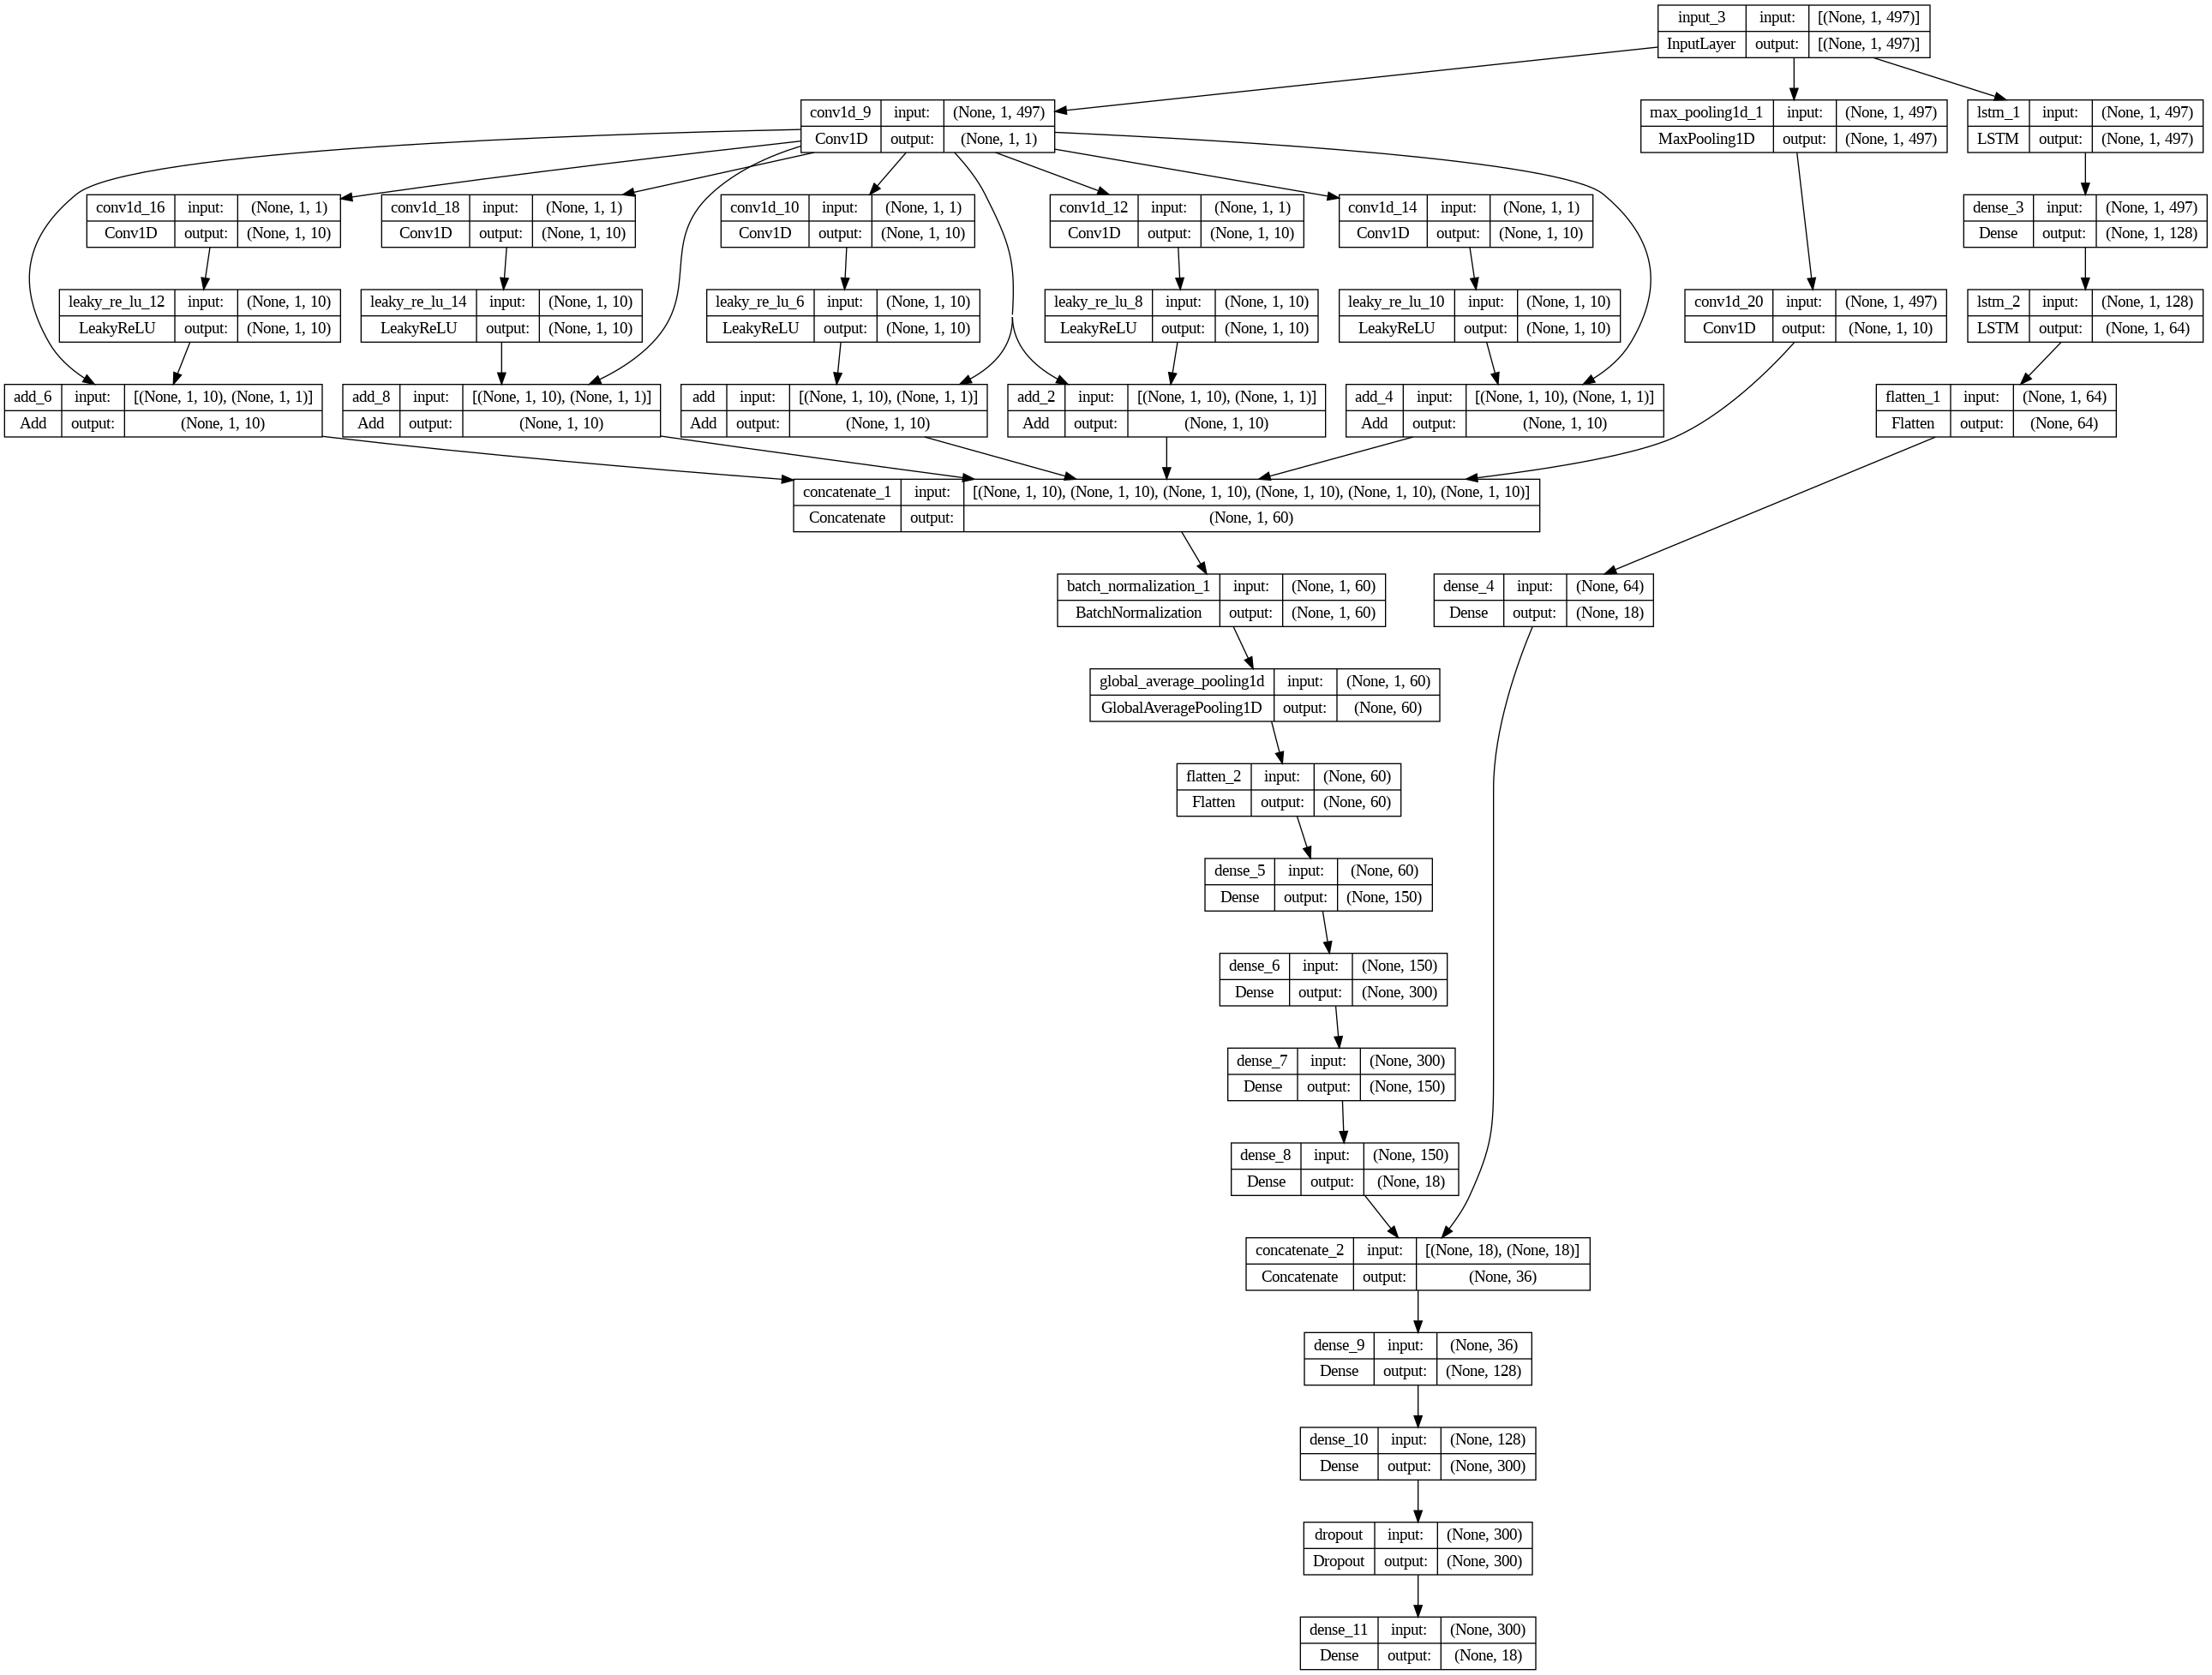

In [32]:
from keras.utils.vis_utils import plot_model
model = Model([input_tensor], output)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [43]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='msle', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# batch_size = 512
# epochs = 1
# batch_size = 1024
# epochs = 100

history = model.fit(X_train, # input data
          Y_train, # target data
          batch_size=64, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          validation_data=(X_test, Y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )

Epoch 1/50
14/14 [==============================] - 12s 134ms/step - loss: 0.0157 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1113 - val_loss: 0.0149 - val_mean_squared_error: 0.0194 - val_mean_absolute_error: 0.1123
Epoch 2/50
14/14 [==============================] - 1s 49ms/step - loss: 0.0154 - mean_squared_error: 0.0227 - mean_absolute_error: 0.1105 - val_loss: 0.0151 - val_mean_squared_error: 0.0194 - val_mean_absolute_error: 0.1118
Epoch 3/50
14/14 [==============================] - 1s 51ms/step - loss: 0.0154 - mean_squared_error: 0.0227 - mean_absolute_error: 0.1109 - val_loss: 0.0142 - val_mean_squared_error: 0.0187 - val_mean_absolute_error: 0.1094
Epoch 4/50
14/14 [==============================] - 1s 50ms/step - loss: 0.0155 - mean_squared_error: 0.0228 - mean_absolute_error: 0.1105 - val_loss: 0.0142 - val_mean_squared_error: 0.0184 - val_mean_absolute_error: 0.1093
Epoch 5/50
14/14 [==============================] - 1s 48ms/step - loss: 0.0154 - mean_squared_err

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [40]:
y_pred = model.predict(X_test)

print("RMSE value: ",mean_squared_error(Y_test, y_pred, squared=False))
print("MSE value: ",mean_squared_error(Y_test, y_pred, squared=True))
print("MAE value: ",mean_absolute_error(Y_test, y_pred))

7/7 [==============================] - 0s 6ms/step
RMSE value:  0.10782341
MSE value:  0.011625881
MAE value:  0.081823414


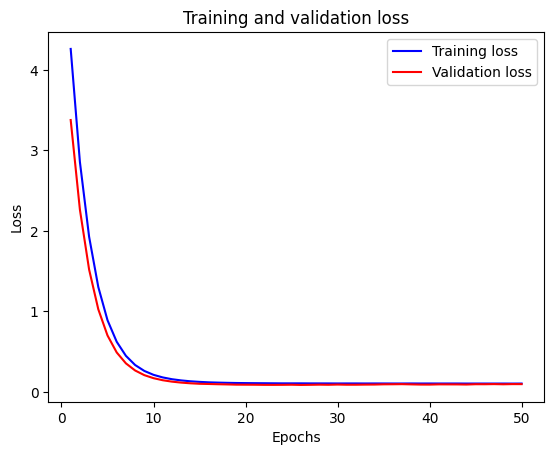

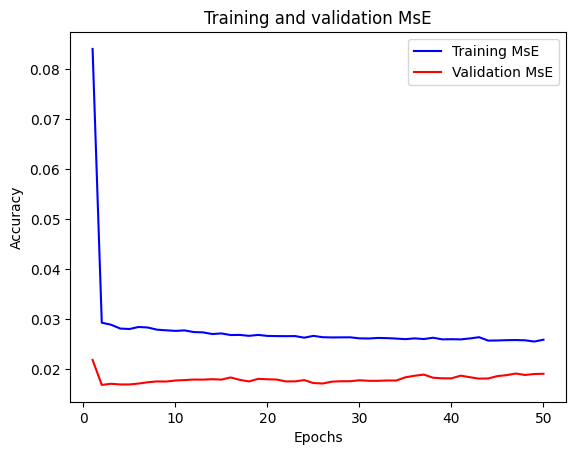

In [34]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'b', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()